In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os.path

In [2]:
# Creamos el directorio de salida
if not os.path.exists("../docs"):
    os.makedirs("../docs")

In [3]:
# defino la función de llamada de los datos

def load_input():
    df = pd.read_csv("../files/input/shipping-data.csv")
    return df

In [4]:
# Crear la función para 'Warehouse_block'
def create_visual_shipping_warehouse(df):
    df = df.copy()
    plt.Figure()
    counts = df.Warehouse_block.value_counts()
    counts.plot.bar(
        title="Shipping per Warehouse",
        xlabel="Warehouse Block",
        ylabel="Record Count",
        color="tab:blue",
        fontsize=8
    )
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    # Salvar la grafica en memoria
    plt.savefig("../docs/shipping_per_warehouse.png")
    

# df = load_input()
# create_visual_shipping_warehouse(df)

In [5]:
# Ahora lo hacemos para 'visual for mode of shipment'

def create_visual_mode_shipment(df):
    df = df.copy()
    plt.figure()
    counts = df.Mode_of_Shipment.value_counts()
    counts.plot.pie(
        title="Mode of Shipment",
        wedgeprops=dict(width=0.35),
        ylabel="",
        colors=["tab:blue","tab:orange","tab:green"]
    )
    plt.savefig("../docs/mode_of_shipment.png")
    

# df = load_input()
# create_visual_mode_shipment(df)
    

In [32]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [6]:
# Visual Average Custom Rating

def create_visual_average_custom_rating(df):
    df = df.copy()
    plt.figure()
    df = (
        df[["Mode_of_Shipment", "Customer_rating"]]
        .groupby("Mode_of_Shipment")
        .describe()        
    )
    df.columns = df.columns.droplevel()
    df = df[["mean", "min", "max"]]
    plt.barh(
        y=df.index.values,
        width=df["max"].values -1,
        left=df["min"].values,
        height=0.9,
        color="lightgray",
        alpha=0.8
    )
    colors = [
        "tab:green" if value >= 3.0 else "tab:orange" for value in df["mean"].values
    ]
    plt.barh(
        y=df.index.values,
        width=df["mean"].values -1,
        left=df["min"].values,
        color=colors,
        height=0.5,
        alpha=1.0
    )
    plt.title("Average Customer Rating")
    plt.gca().spines["bottom"].set_color("gray")
    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    # Salvar la grafica en memoria
    plt.savefig("../docs/average_customer_rating.png")
    return df


# df = load_input()
# print(create_visual_average_custom_rating(df))

In [7]:
def create_visual_weight_distribution(df):
    df = df.copy()
    plt.figure()
    df.Weight_in_gms.plot.hist(
        title="Shipped Weight Distribution",
        color="tab:orange",
        edgecolor="white",
    )
    plt.gca().spines["right"].set_visible(False)
    plt.gca().spines["top"].set_visible(False)
    # Salvar la grafica en memoria
    plt.savefig("../docs/weight_distribution.png")
    
# df = load_input()
# create_visual_weight_distribution(df)

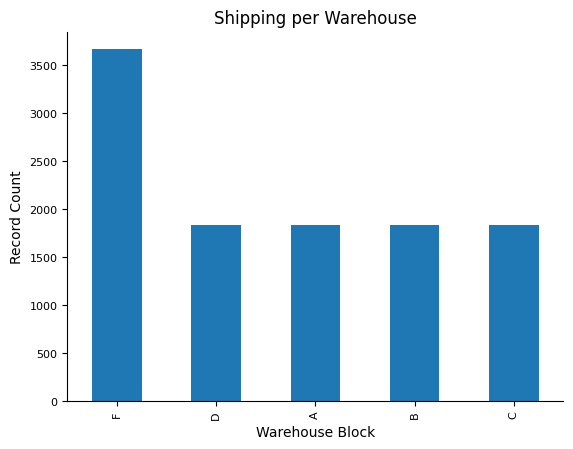

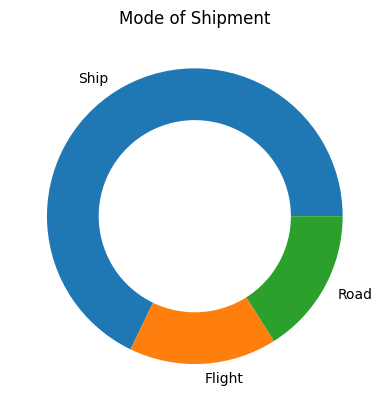

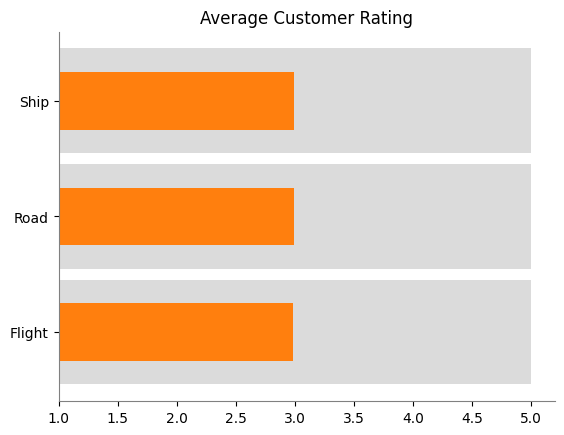

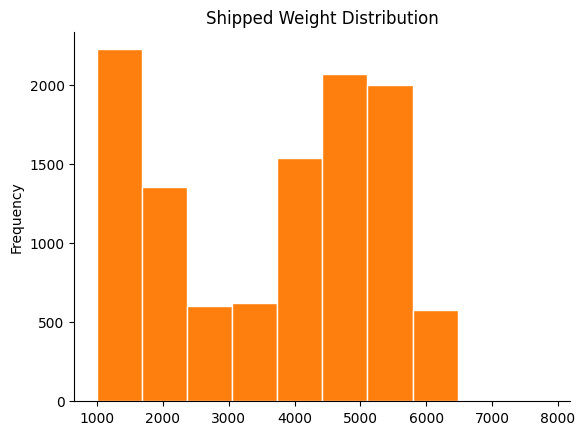

In [8]:
# Crear y ver todas la figuras

df = load_input()
create_visual_shipping_warehouse(df)
create_visual_mode_shipment(df)
create_visual_average_custom_rating(df)
create_visual_weight_distribution(df)

In [9]:
%%writefile ../docs/index.html
<!DOCTYPE html>
<html>
  <body>
    <h1>Shipping Dashboard Example</h1>
    <div style="width:45%;float:left">
      <img src="../docs/shipping_per_warehouse.png" alt="Fig 1">
      <img src="../docs/mode_of_shipment.png" alt="Fig 2">
    </div>
    <div style="width:45%;float:left">
      <img src="../docs/average_customer_rating.png" alt="Fig 3">
      <img src="../docs/weight_distribution.png" alt="Fig 4">
    </div>
  </body>
</html>


Writing ../docs/index.html
